In [12]:
import os
import numpy as np
import matplotlib.pyplot as plt

from cdcm import *

# Simulation Saver

SimulationSaver class provides the functionality to save simulated results in 
HDF5 files. We can either provide the ```h5``` file name or the group of an h5
file where results should be saved. An HDF5 file will be created and results
will be saved if we give the name of the file which should be created instead of group.

In [13]:
# Let's create a system

with System(name="sys") as sys:
    x = make_node("S:x:0.1:meters", description="The state of the system.")
    r = make_node("P:r:1.2:meters/second", description="The rate of change.")
    dt = make_node("P:dt:0.1:second", description="The timestep.")
    sigma = make_node("P:sigma:0.01:meters",
        description="The standard deviation of measurement noise.")
    y = make_node("V:y", value=0.5, units="meters", description="A sensor measurement.")

    @make_function(x)
    def f(x=x, r=r, dt=dt):
        """The transition function."""
        return x + r * dt

    @make_function(y)
    def g(x=x, sigma=sigma):
        return x + sigma * np.random.randn()

print(sys)

sys:
  description: ''
  owner: ''
  nodes:
    x:
      description: The state of the system.
      owner: sys
      parents: ('f',)
      children: ('f', 'g')
      value: 0.1
      units: meters
      track: true
    r:
      description: The rate of change.
      owner: sys
      parents: ()
      children: ('f',)
      value: 1.2
      units: meters/second
      track: true
    dt:
      description: The timestep.
      owner: sys
      parents: ()
      children: ('f',)
      value: 0.1
      units: second
      track: true
    sigma:
      description: The standard deviation of measurement noise.
      owner: sys
      parents: ()
      children: ('g',)
      value: 0.01
      units: meters
      track: true
    y:
      description: A sensor measurement.
      owner: sys
      parents: ('g',)
      children: ()
      value: 0.5
      units: meters
      track: true
    f:
      description: The transition function.
      owner: sys
      parents: ('x', 'r', 'dt')
      children

### Saving the results
We now create a CDCM SimulationSaver object called ```saver``` which will save the simulation results when simulation is run to the file with name ```test.h5```. We run the simulation by calling the forward() and tranistion() functions of the ```sys``` inside a for loop till the maximum step is reached.

The Simulation saver assumes that the file with given file name does not exist when a file name is passed as argument. Due to this reason, the file is removed before creating Simulation saver object if it exists already.

In [14]:
max_steps = 1000
if os.path.exists("test.h5"):
        os.remove("test.h5")
saver = SimulationSaver("test.h5", sys, max_steps=max_steps)

In [15]:
for i in range(max_steps):
    sys.forward()
    saver.save()
    if i % 100 == 0:
        print(f"x: {sys.x.value:1.3f} {sys.y.value:1.3f}")
    sys.transition()

x: 0.100 0.110
x: 12.100 12.099
x: 24.100 24.110
x: 36.100 36.084
x: 48.100 48.098
x: 60.100 60.110
x: 72.100 72.101
x: 84.100 84.101
x: 96.100 96.092
x: 108.100 108.105


### Fetching the results

In [16]:
# Here is how you can get all the data saved so far
xs = saver.file_handler["/sys/x"][:]
ys = saver.file_handler["/sys/y"][:]

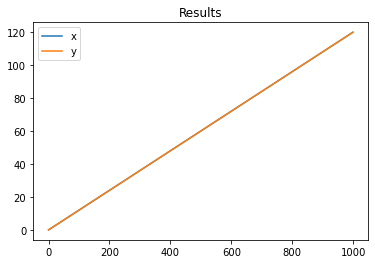

In [18]:
plt.plot(np.arange(max_steps), xs, label='x')
plt.plot(np.arange(max_steps), ys, label='y')
plt.title('Results')
plt.legend()
plt.show()